
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std[self.std == 0] = 1 # Replace 0 with 1, as division by 0 gives inf, which is problematic
        return self

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        # Fit and then transform the data
        self.fit(X)
        return self.transform(X)

In [3]:
# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Make predictions
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Calculate and store loss (Mean Squared Error + L2 regularization term)
            loss = (1/n_samples) * np.sum((y_predicted - y)**2) + (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights**2)
            self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [4]:
#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


 Implementing Logistic Regression Manual

In [5]:
#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Linear combination of inputs and weights
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function to get probabilities
            y_predicted = sigmoid(linear_model)

            # Calculate gradients
            # Binary Cross Entropy gradient for weights with L2 regularization
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.l2_lambda / n_samples) * self.weights
            # Binary Cross Entropy gradient for bias
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Calculate and store loss (Binary Cross Entropy + L2 regularization term)
            loss = - (1 / n_samples) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            loss += (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights**2)
            self.loss_history.append(loss)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)


#### Standardize the data using `StandardScalerManual`

In [7]:
from sklearn.model_selection import train_test_split

# Generate synthetic data for binary classification
np.random.seed(42)
n_samples = 200
n_features = 2

X = np.random.randn(n_samples, n_features) * 3  # Features
y = (X[:, 0] + X[:, 1] + np.random.randn(n_samples) > 0).astype(int) # Binary target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (160, 2)
y_train shape: (160,)
X_test shape: (40, 2)
y_test shape: (40,)


In [8]:
scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Mean of X_train_scaled features:", np.mean(X_train_scaled, axis=0))
print("Std of X_train_scaled features:", np.std(X_train_scaled, axis=0))

Mean of X_train_scaled features: [ 2.91433544e-17 -3.74700271e-17]
Std of X_train_scaled features: [1. 1.]


#### Train `LogisticRegressionManual` and plot loss curve

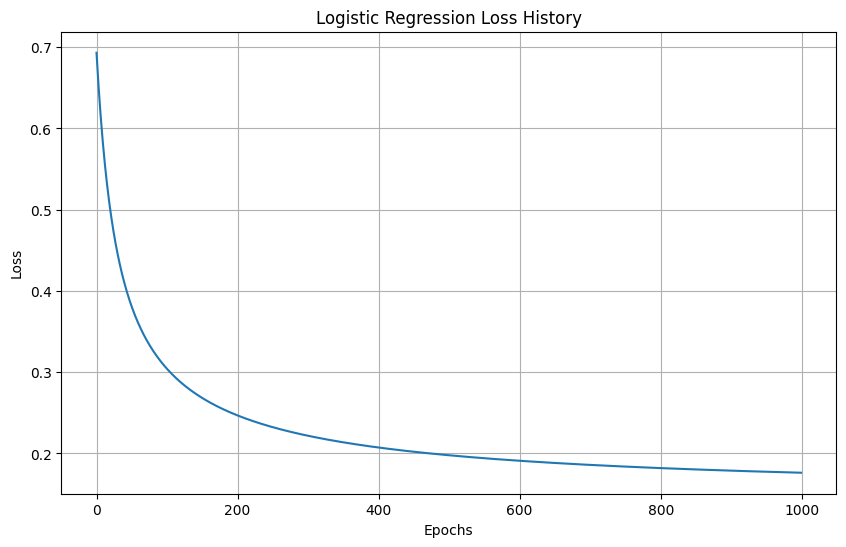

In [9]:
import matplotlib.pyplot as plt

lr_model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
lr_model.fit(X_train_scaled, y_train)

plt.figure(figsize=(10, 6))
plt.plot(lr_model.loss_history)
plt.title('Logistic Regression Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

#### Evaluate `LogisticRegressionManual` accuracy

In [10]:
y_pred = lr_model.predict(X_test_scaled)
accuracy = np.mean(y_pred == y_test)

print(f"Logistic Regression Test Accuracy: {accuracy:.4f}")

Logistic Regression Test Accuracy: 0.9750



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [11]:
from sklearn.cluster import KMeans

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100, random_state=None):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    n_rows, n_cols = M.shape
    # Flatten the matrix to apply K-Means on individual elements
    flat_M = M.reshape(-1, 1)

    # Initialize and fit KMeans
    # The n_init='auto' is used to address a future change in scikit-learn's default n_init parameter.
    # random_state for reproducibility.
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
    kmeans.fit(flat_M)

    # Get cluster labels and reshape them back to the original matrix shape
    assignment_table = kmeans.labels_.reshape(n_rows, n_cols)

    # Get centroids
    centroids = kmeans.cluster_centers_.flatten()

    # Create the cookbook
    cookbook = {i: [] for i in range(k)}
    for r in range(n_rows):
        for c in range(n_cols):
            cluster_label = assignment_table[r, c]
            cookbook[cluster_label].append((r, c))

    return assignment_table, cookbook, centroids



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
